# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-03-31 03:20:18--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-31 03:20:18--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

c

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [7]:
df.duplicated().sum()

np.int64(0)

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [8]:
df['Valor Total'] = df['quantity'] * df['price']

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Valor Total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

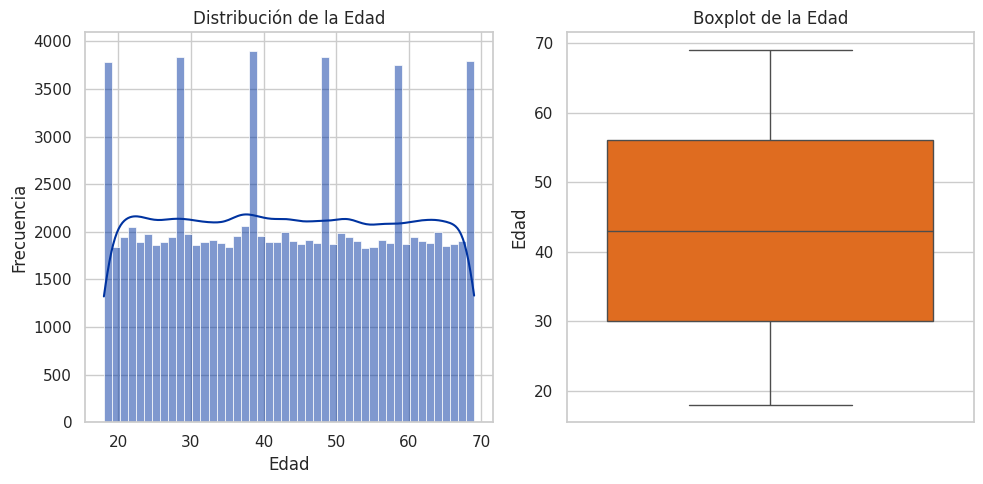

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color=corporate_colors[0])
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['age'], color=corporate_colors[1])
plt.title('Boxplot de la Edad')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

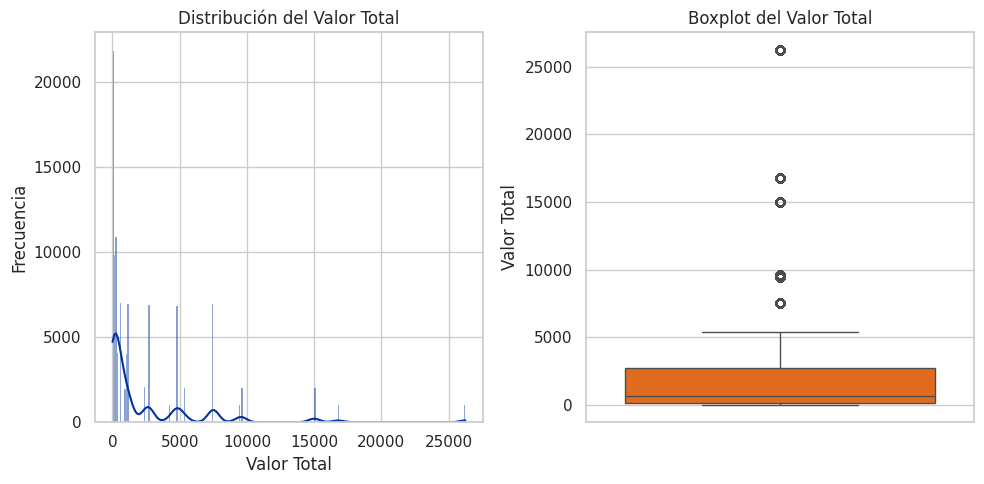

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Valor Total'], kde=True, color=corporate_colors[0])
plt.title('Distribución del Valor Total')
plt.xlabel('Valor Total')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Valor Total'], color=corporate_colors[1])
plt.title('Boxplot del Valor Total')
plt.ylabel('Valor Total')

plt.tight_layout()
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

RTA: Identificar el tipo de población puede ser crucial para definir estrategias, donde a la población Joven se puede enfocar hacia porductos novedosos y tecnologicos, el segmento de adulto mayor puede acoger temas como la salud y el bienestar.

In [11]:
bins = [18, 30, 50, float('inf')]
labels = ['Jóvenes', 'Adultos', 'Mayores']
df['Rango Edad'] = pd.cut(df['age'], bins=bins, labels=labels)

In [12]:
segmento_edad_genero = df.groupby(['Rango Edad', 'gender'])['customer_id'].nunique().unstack()

print(segmento_edad_genero)

gender      Female   Male
Rango Edad               
Jóvenes      13832   9348
Adultos      22960  15372
Mayores      21611  14490


<ipython-input-12-1ed89e634490>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmento_edad_genero = df.groupby(['Rango Edad', 'gender'])['customer_id'].nunique().unstack()


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

RTA: La categoría de Ropa es una de las mas vendidas, donde el método de pago  targeta de crédito y efectivo son los mas utilizados en el centro comercial Istanbul.

In [14]:
df.groupby(['category', 'payment_method', 'shopping_mall'])['customer_id'].nunique().unstack()

shopping_mall                   Cevahir AVM  Emaar Square Mall  \
category        payment_method                                   
Books           Cash                    115                101   
                Credit Card              90                 87   
                Debit Card               53                 48   
Clothing        Cash                    787                731   
                Credit Card             601                567   
                Debit Card              341                353   
Cosmetics       Cash                    311                323   
                Credit Card             281                276   
                Debit Card              140                161   
Food & Beverage Cash                    352                304   
                Credit Card             267                248   
                Debit Card              153                140   
Shoes           Cash                    208                236   
                Credit Card             183                165   
                Debit Card               99                 97   
Souvenir        Cash                    108                104   
                Credit Card              84                 94   
                Debit Card               48                 49   
Technology      Cash                    106                115   
                Credit Card              90                 95   
                Debit Card               60                 53   
Toys            Cash                    241                200   
                Credit Card             183                164   
                Debit Card               90                100   

shopping_mall                   Forum Istanbul  Istinye Park  Kanyon  \
category        payment_method                                         
Books           Cash                       117           215     466   
                Credit Card                 85           137     347   
                Debit Card                  50           110     200   
Clothing        Cash                       762          1534    3012   
                Credit Card                611          1180    2395   
                Debit Card                 356           639    1433   
Cosmetics       Cash                       343           660    1324   
                Credit Card                274           518    1092   
                Debit Card                 153           280     607   
Food & Beverage Cash                       307           649    1310   
                Credit Card                261           540    1013   
                Debit Card                 144           301     586   
Shoes           Cash                       201           438     912   
                Credit Card                176           364     692   
                Debit Card                  81           199     413   
Souvenir        Cash                       121           241     454   
                Credit Card                 79           174     359   
                Debit Card                  61           100     224   
Technology      Cash                        96           220     467   
                Credit Card                 77           162     338   
                Debit Card                  61           105     192   
Toys            Cash                       236           479     908   
                Credit Card                187           347     680   
                Debit Card                 108           189     399   

shopping_mall                   Mall of Istanbul  Metrocity  Metropol AVM  \
category        payment_method                                              
Books           Cash                         461        335           222   
                Credit Card                  346        278           162   
                Debit Card                   218        139            92   
Clothing        Cash     

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

RTA: La Categoría de ropa es la de mayor venta en especial en el género femenino.

In [15]:
df.groupby(['category', 'gender'])['customer_id'].nunique().unstack()

gender,Female,Male
category,,
Books,2906,2075
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Toys,6085,4002


In [16]:
df.groupby(['category'])['customer_id'].count()

,customer_id
category,
Books,4981
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Shoes,10034
Souvenir,4999
Technology,4996
Toys,10087


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

RTA: Agrupar categorías similares como ropa y zapatos, recuerdos y libros en otros por el número total dentro de la base.

In [17]:
df['categoria'] = df['category'].replace({
                  'Clothing': 'ClothingandShoes',
                  'Shoes': 'ClothingandShoes',
                  'Cosmetics': 'Cosmetics',
                  'Food & Beverage' : 'Food & Beverage',
                  'Technology' : 'Technology',
                  'Toys' : 'Toys' ,
                  'Souvenir': 'Otro',
                  'Books': 'Otro'
                })

In [18]:
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Valor Total,Rango Edad,categoria
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Jóvenes,ClothingandShoes
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Jóvenes,ClothingandShoes
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,Jóvenes,ClothingandShoes
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Mayores,ClothingandShoes
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Mayores,Otro


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

Pregunta: ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

RTA: conocer la edad y el género permite identifcar segmentos especificos de población.

In [21]:
bins = [18, 30, 50, float('inf')]
labels = ['Jóvenes', 'Adultos', 'Mayores']
df['Rango Edad'] = pd.cut(df['age'], bins=bins, labels=labels)

In [23]:
def asignar_segmento(row):
    return f"{row['Rango Edad']}_{row['categoria']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adultos_ClothingandShoes,17140
1,Mayores_ClothingandShoes,16126
2,Jóvenes_ClothingandShoes,10438
3,Adultos_Cosmetics,5831
4,Adultos_Food & Beverage,5743
5,Mayores_Cosmetics,5547
6,Mayores_Food & Beverage,5346
7,Adultos_Toys,3827
8,Adultos_Otro,3820
9,Mayores_Otro,3656


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

RTA: Los adultos y mayores tienen el mayor valor.

Venta Total por Segmento Combinado:
               Segmento_Comb        venta
0   Adultos_ClothingandShoes  69340813.26
1          Adultos_Cosmetics   2629238.24
2    Adultos_Food & Beverage    330473.24
3               Adultos_Otro    560996.28
4         Adultos_Technology  22785000.00
5               Adultos_Toys   1503738.88
6   Jóvenes_ClothingandShoes  42464884.55
7          Jóvenes_Cosmetics   1545771.22
8    Jóvenes_Food & Beverage    197615.55
9               Jóvenes_Otro    346926.21
10        Jóvenes_Technology  13143900.00
11              Jóvenes_Toys    950584.32
12  Mayores_ClothingandShoes  65503961.43
13         Mayores_Cosmetics   2492620.64
14   Mayores_Food & Beverage    307398.48
15              Mayores_Otro    529883.37
16        Mayores_Technology  21027300.00
17              Mayores_Toys   1446968.32
18      nan_ClothingandShoes   3240583.27
19             nan_Cosmetics    125232.80
20       nan_Food & Beverage     14047.78
21                  nan_Otro     32571.6

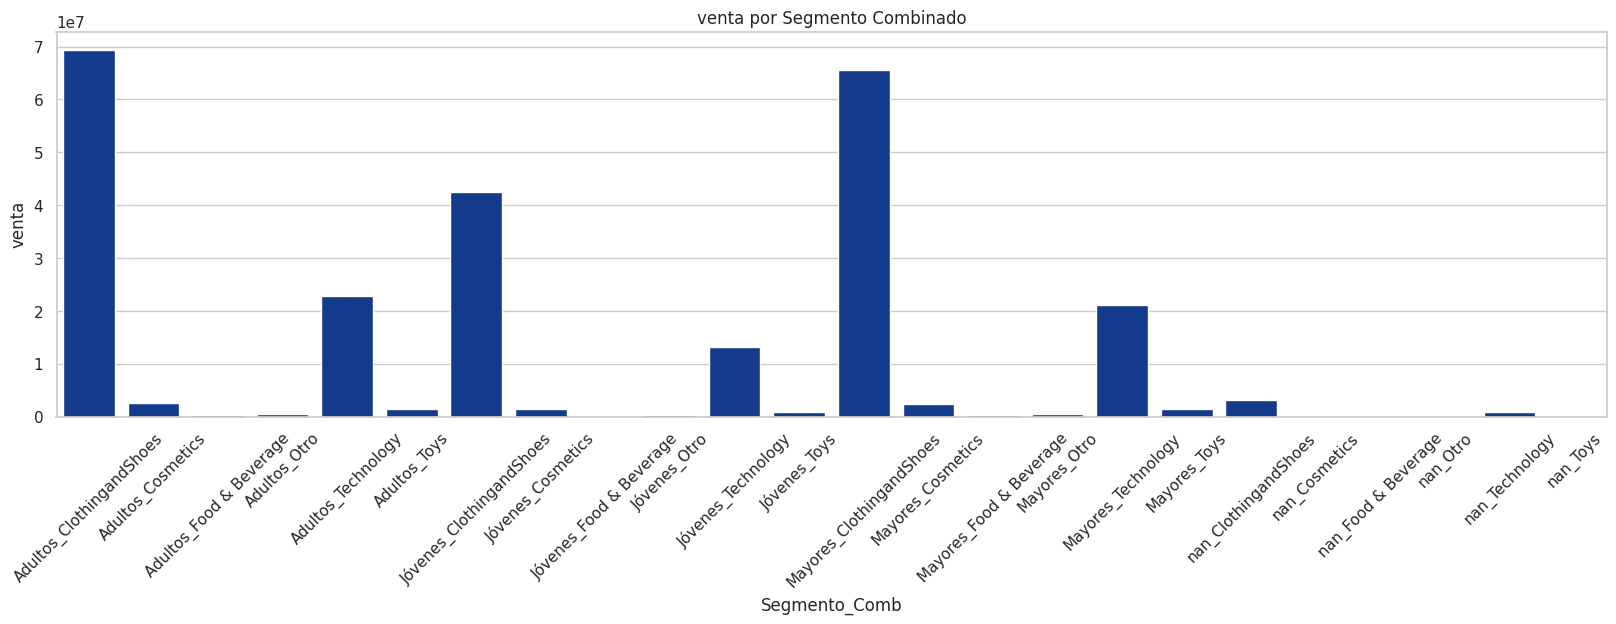

In [31]:
venta_segmentos = df.groupby('Segmento_Comb')['Valor Total'].sum().reset_index()
venta_segmentos.columns = ['Segmento_Comb', 'venta']
print("Venta Total por Segmento Combinado:")
print(venta_segmentos)

plt.figure(figsize=(20,5))
sns.barplot(x='Segmento_Comb', y='venta', data=venta_segmentos)
plt.title('venta por Segmento Combinado')
plt.xticks(rotation=45)
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!